# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
train_df = pd.read_csv(url, index_col=0)
#train_df = pd.read_csv('mashable.csv', index_col=0,)

train_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [3]:
train_df.shape

(6000, 61)

In [4]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [5]:
y.mean()

0.5

In [6]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

#### Regresión Logistica

In [7]:
logreg = LogisticRegression(solver='liblinear',C=1e9).fit(X_train, y_train)
y_pred = logreg.predict(X_test)

* Accuracy
* F1-Score

In [8]:
print('Accuracy:',metrics.accuracy_score(y_pred, y_test),'f1_score:',metrics.f1_score(y_pred, y_test))

Accuracy: 0.6273333333333333 f1_score: 0.6099092812281925


#### Tree Classifier

In [9]:
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1).fit(X_train, y_train)
y_pred = treeclf.predict(X_test)

In [10]:
print('Accuracy:',metrics.accuracy_score(y_pred, y_test),'f1_score:',metrics.f1_score(y_pred, y_test))

Accuracy: 0.6413333333333333 f1_score: 0.6072992700729928


# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [11]:
np.random.seed(123)
n_samples = X_train.shape[0]
#n_B = 300

#samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
#len(samples)

n_estimators = 300
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]


In [12]:
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(100):
    trees[i] = DecisionTreeClassifier(max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [13]:
for i in range(100,200):
    trees[i] = DecisionTreeClassifier(max_depth=2, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [14]:
for i in range(200,300):
    trees[i] =LogisticRegression(solver='liblinear',C=1e9)
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [15]:
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))

for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2520,1,0,0,0,1,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
trees[1]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1347,
            splitter='best')

Predict using majority voting

In [17]:
y_pred_df.sum(axis=1)[:10]

1483    283
2185    262
2520    257
3721    275
3727     20
4524    163
234      16
4735     55
5839    110
2939    252
dtype: int64

In [18]:
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators/ 2)).astype(np.int)

In [19]:
y_pred

1483    1
2185    1
2520    1
3721    1
3727    0
4524    1
234     0
4735    0
5839    0
2939    1
3053    1
867     1
276     1
5798    0
3512    1
5789    0
3198    1
5908    1
5718    0
2687    0
250     0
5461    1
3052    0
2711    1
3771    0
5988    0
5645    0
4617    0
368     1
4916    0
       ..
19      0
4088    1
1395    1
2576    0
2878    0
3147    0
4513    0
1620    0
4522    1
5485    1
2394    0
1691    0
4949    0
2805    1
494     1
5287    0
3316    0
3176    1
2372    1
5947    1
5782    0
1814    0
4704    0
5333    0
946     1
3077    0
5166    0
2227    1
5684    0
1937    0
Length: 1500, dtype: int32

In [20]:
y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2520,1,0,0,0,1,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print('Accuracy:',metrics.accuracy_score(y_pred, y_test),'f1_score:',metrics.f1_score(y_pred, y_test))

Accuracy: 0.6386666666666667 f1_score: 0.6272352132049518


- El Accuracy aumenta con respecto a la regresión logistica, si embargo, disminuye frente al tree classifier

In [22]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [23]:
clf.fit(X_train, y_train)
y_pred_2 = clf.predict(X_test)

In [24]:
print('f1_score:',metrics.f1_score(y_pred_2, y_test), 'Accuracy:',metrics.accuracy_score(y_pred_2, y_test))

f1_score: 0.6474064346684175 Accuracy: 0.642


# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [25]:
y_pred.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,802,0.534667
1,698,0.465333


In [26]:
threshold =np.arange(0.0,1, 0.005)
f1_score=[]

for i in threshold:
    y_pred = (y_pred_df.sum(axis=1)/n_estimators>=i ).astype(np.int)
    f1_score.append([ i, metrics.f1_score(y_pred, y_test)])
    
f1_score=pd.DataFrame(f1_score, columns=['threshold', 'f1_score'])
max_f1_score=f1_score.loc[f1_score['f1_score'].idxmax()]

print('Max score:\n',max_f1_score)

Max score:
 threshold    0.145000
f1_score     0.711205
Name: 29, dtype: float64


Text(0,0.5,'f1-Score')

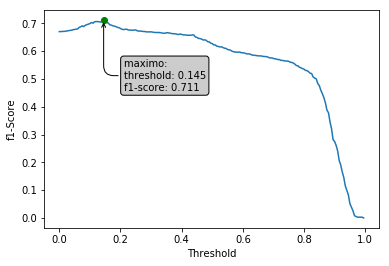

In [27]:
plt.plot( f1_score['threshold'],f1_score['f1_score'])
plt.plot( max_f1_score['threshold'],max_f1_score['f1_score'],'go')
plt.annotate('maximo: \n'+
            'threshold: '+str(round(max_f1_score['threshold'],3))+'\n'+
             'f1-score: '+str(round(max_f1_score['f1_score'],3)),
             xy=( max_f1_score['threshold'],max_f1_score['f1_score']),
             xycoords='data',
             xytext=(20, -70), textcoords='offset points', 
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.xlabel('Threshold')
plt.ylabel('f1-Score')

In [28]:
probability= pd.DataFrame({'COUNT': y_pred_df.sum(axis=1)})
probability['RATIO']=(probability/n_estimators)*100
probability.head()

,COUNT,RATIO
1483,283,94.333333
2185,262,87.333333
2520,257,85.666667
3721,275,91.666667
3727,20,6.666667


In [29]:
probability.max()

COUNT    297.0
RATIO     99.0
dtype: float64

In [30]:
res=[]
for i in range(y_pred_df.shape[1]):
    res.append(metrics.accuracy_score(y_pred_df.iloc[:,i],y_test))
pd.Series(res).describe()

count    300.000000
mean       0.608169
std        0.033054
min        0.519333
25%        0.575333
50%        0.620000
75%        0.636000
max        0.654667
dtype: float64

In [31]:
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 0.5)).astype(np.int)

In [32]:
print('f1_score:',metrics.f1_score(y_pred, y_test))

f1_score: 0.0


# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

Select each oob sample

In [33]:
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

Estimate the oob error of each classifier

In [34]:
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5,1,'OOB error of each tree')

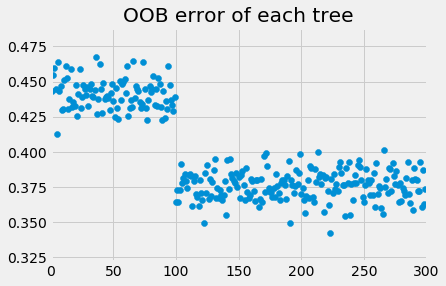

In [35]:
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

Estimate \alphaα

In [36]:
alpha = (1 - errors) / (1 - errors).sum()

In [37]:
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)

In [38]:
weighted_sum_1.head(20)

1483    0.947566
2185    0.882815
2520    0.867422
3721    0.922687
3727    0.061498
4524    0.540412
234     0.050275
4735    0.169998
5839    0.362162
2939    0.851655
3053    0.869616
867     0.891092
276     0.870077
5798    0.052420
3512    0.916403
5789    0.083208
3198    0.898103
5908    0.922369
5718    0.142574
2687    0.068857
dtype: float64

In [39]:
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)

In [40]:
print('Accuracy:', metrics.accuracy_score(y_pred, y_test),'f1_score:',metrics.f1_score(y_pred, y_test))

Accuracy: 0.638 f1_score: 0.6257753273604412


Using Weighted voting with sklearn

In [41]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_estimators, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)
y_pred_2 = clf.predict(X_test)

In [42]:
print('Accuracy:', metrics.accuracy_score(y_pred_2, y_test),'f1_score:',metrics.f1_score(y_pred_2, y_test))

Accuracy: 0.642 f1_score: 0.6474064346684175


In [43]:
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_2 = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [44]:
print('Accuracy:', metrics.accuracy_score(y_pred_2, y_test),'f1_score:',metrics.f1_score(y_pred_2, y_test))

Accuracy: 0.6426666666666667 f1_score: 0.6487549148099607


# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [45]:
y_pred.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,805,0.536667
1,695,0.463333


In [46]:
threshold =np.arange(0.0,1, 0.005)
f1_score=[]

for i in threshold:
    y_pred = (weighted_sum_1 >=i ).astype(np.int)
    f1_score.append([ i, metrics.f1_score(y_pred, y_test)])
    
f1_score=pd.DataFrame(f1_score, columns=['threshold', 'f1_score'])
max_f1_score=f1_score.loc[f1_score['f1_score'].idxmax()]

print('Max score:\n',max_f1_score)

Max score:
 threshold    0.135000
f1_score     0.710084
Name: 27, dtype: float64


Text(0,0.5,'f1-Score')

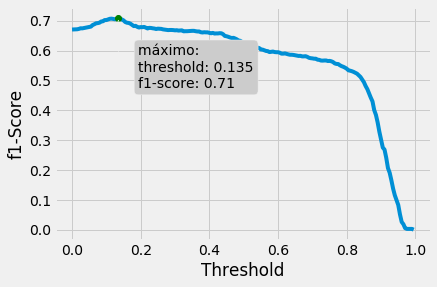

In [47]:
plt.plot( f1_score['threshold'],f1_score['f1_score'])
plt.plot( max_f1_score['threshold'],max_f1_score['f1_score'],'go')
plt.annotate('máximo: \n'+
            'threshold: '+str(round(max_f1_score['threshold'],3))+'\n'+
             'f1-score: '+str(round(max_f1_score['f1_score'],3)),
             xy=( max_f1_score['threshold'],max_f1_score['f1_score']),
             xycoords='data',
             xytext=(20, -70), textcoords='offset points', 
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.xlabel('Threshold')
plt.ylabel('f1-Score')

In [48]:
probability= pd.DataFrame({'COUNT': weighted_sum_1})
probability['RATIO']=(probability/n_estimators)*100
probability.head()

,COUNT,RATIO
1483,0.947566,0.315855
2185,0.882815,0.294272
2520,0.867422,0.289141
3721,0.922687,0.307562
3727,0.061498,0.020499


In [49]:
probability.max()

COUNT    0.990733
RATIO    0.330244
dtype: float64

In [50]:
y_pred = (weighted_sum_1 >= 0.25).astype(np.int)

In [51]:
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 0.5)).astype(np.int)

# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [52]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))

for i in range(n_estimators):
    X_train_2[i] = trees[i].predict(X_train)

In [53]:
X_train_2.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2420,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1225,1,0,0,0,1,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
324,0,0,0,0,0,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
5863,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,0,1
86,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [54]:
lr = LogisticRegressionCV(cv = 5, random_state=123 )
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=123,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [55]:
lr.coef_

array([[ 7.78744293e-02,  8.05362432e-02,  7.56846727e-02,
         7.79403176e-02,  7.84568095e-02,  8.29130563e-02,
         7.60496677e-02,  7.80413037e-02,  7.61941169e-02,
         7.96693273e-02,  8.05398825e-02,  7.69037463e-02,
         7.68418952e-02,  7.84002902e-02,  8.00739608e-02,
         8.10270961e-02,  7.61134644e-02,  7.95813056e-02,
         7.68768329e-02,  7.85339814e-02,  7.78980508e-02,
         7.87653307e-02,  7.78039735e-02,  7.65002678e-02,
         7.86918458e-02,  7.83463730e-02,  7.54321202e-02,
         7.61549151e-02,  7.88891755e-02,  7.76641113e-02,
         7.90377195e-02,  7.90037817e-02,  7.64216210e-02,
         7.83368977e-02,  8.06648848e-02,  8.05611047e-02,
         7.50815394e-02,  7.92903487e-02,  7.80543148e-02,
         7.46092489e-02,  7.80978808e-02,  7.95469926e-02,
         7.70286351e-02,  7.87034400e-02,  7.91530622e-02,
         7.87260080e-02,  7.96105088e-02,  7.89660004e-02,
         7.69284558e-02,  7.89764835e-02,  7.77444471e-0

In [56]:
y_pred = lr.predict(y_pred_df)

In [57]:
print('f1_score:',metrics.f1_score(y_pred, y_test), 'Accuracy:',metrics.accuracy_score(y_pred, y_test))

f1_score: 0.6425755584756899 Accuracy: 0.6373333333333333


In [58]:
threshold =np.arange(0.0,1, 0.001)
f1_score=[]

for i in threshold:
    y_pred = np.where(lr.predict_proba(y_pred_df)[:,1] >= i, 1, 0)
    f1_score.append([ i, metrics.f1_score(y_pred, y_test)])
    
f1_score=pd.DataFrame(f1_score, columns=['threshold', 'f1_score'])
max_f1_score=f1_score.loc[f1_score['f1_score'].idxmax()]
print('Max score:\n',max_f1_score)

Max score:
 threshold    0.243000
f1_score     0.709845
Name: 243, dtype: float64


Using sklearn

In [59]:
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))
X_train_3 = np.zeros((X_train.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):

    X_train_3[:, i] = clf.estimators_[i].predict(X_train)
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
lr = LogisticRegressionCV(cv=5)
lr.fit(X_train_3, y_train)

y_pred = lr.predict(y_pred_all_)

In [60]:
print('f1_score:',metrics.f1_score(y_pred, y_test), 'Accuracy:',metrics.accuracy_score(y_pred, y_test))

f1_score: 0.6496398166339227 Accuracy: 0.6433333333333333


In [61]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [62]:
print('f1_score:',metrics.f1_score(y_pred, y_test), 'Accuracy:',metrics.accuracy_score(y_pred, y_test))

f1_score: 0.545819397993311 Accuracy: 0.5473333333333333
